<a href="https://colab.research.google.com/github/jraval/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JAY_RAVAL_LS_DS_PT9_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [69]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-09-13 22:39:37--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.17.75
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.17.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.6MB/s    in 13s     

2020-09-13 22:39:51 (14.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [70]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [71]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [72]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk



1. Banana                    18726
2. Bag of Organic Bananas    15480
3. Organic Strawberries      10894
4. Organic Baby Spinach       9784
5. Large Lemon                8135
6. Organic Avocado            7409
7. Organic Hass Avocado       7293
8. Strawberries               6494
9. Limes                      6033
10. Organic Raspberries        5546
11. Organic Blueberries        4966
First, write down which columns you need and which dataframes have them. 1) We need the products.csv dataframe

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [73]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
##### YOUR CODE HERE #####
fruit_veggies = pd.read_csv('/content/instacart_2017_05_01/orders.csv')
fruit_veggies.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [75]:
fruit_veggies2 = pd.read_csv('/content/instacart_2017_05_01/order_products__train.csv')
fruit_veggies2.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [76]:
fruit_veggies3 = pd.read_csv('/content/instacart_2017_05_01/instacart_2017_05_01/products.csv')
fruit_veggies3.head(20)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [77]:
fruit_veggies3.shape

(49688, 4)

In [78]:
#Merge frames
listed_groceries = pd.merge(fruit_veggies2, fruit_veggies3)
listed_groceries

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
...,...,...,...,...,...,...,...
1384612,3420011,1528,12,0,Sprinkles Decors,97,13
1384613,3420084,47935,20,0,Classic Original Lip Balm SPF 12,73,11
1384614,3420084,9491,21,0,Goats Milk & Chai Soap,25,11
1384615,3420088,16380,12,0,Stevia Sweetener,97,13


In [166]:
listed_groceries['product_name'].value_counts(sort=True, ascending=False).head(15)

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Organic Blueberries        4966
Organic Whole Milk         4908
Organic Cucumber           4613
Organic Zucchini           4589
Organic Yellow Onion       4290
Name: product_name, dtype: int64

In [165]:
print(listed_groceries[listed_groceries.product_name == 'Organic Whole Milk'].shape[0])

4908


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [81]:
# "Concatenate" is a fancy word for joining two things together.  For example, 
#we can concatenate two strings together using the + operator.
'We can join/concatenate two strings together' + ' using the "+" operator.'

'We can join/concatenate two strings together using the "+" operator.'

In [82]:
import pandas as pd
df1 = pd.DataFrame({'a': [1,2,3,4], 'b': [4,5,6,7], 'c': [7,8,9,10]})
df2 = pd.DataFrame({'a': [6,4,8,7], 'b': [9,4,3,2], 'c': [1,6,2,9]})

In [83]:
df1.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [84]:
df2.head()

,a,b,c
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [85]:
#Concatenate by rows is the default behavior of pd.concat.  This is often the most common form of concatenation.
by_rows = pd.concat([df1, df2])
by_rows

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [86]:
#Concat by columns
by_cols = pd.concat([df1,df2], axis=1)
by_cols

,a,b,c,a,b,c
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


In [87]:
import pandas as pd

df3 = pd.DataFrame({'a': [4,3,2,1], 'b': [4,5,6,7], 'c': [7,8,9,10]})
df4 = pd.DataFrame({'a': [6,4,8,7,8], 'b': [9,4,3,2,1], 'd': [1,6,2,9,5]})

In [88]:
df3.head()

,a,b,c
0,4,4,7
1,3,5,8
2,2,6,9
3,1,7,10


In [89]:
df4.head()

,a,b,d
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9
4,8,1,5


In [90]:
by_rows2 = pd.concat([df3, df4])

In [91]:
by_rows2

,a,b,c,d
0,4,4,7.0,NaN
1,3,5,8.0,NaN
2,2,6,9.0,NaN
3,1,7,10.0,NaN
0,6,9,NaN,1.0
1,4,4,NaN,6.0
2,8,3,NaN,2.0
3,7,2,NaN,9.0
4,8,1,NaN,5.0


In [92]:
by_cols2 = pd.concat([df3, df4], axis=1)

In [93]:
by_cols2

,a,b,c,a,b,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


In [94]:
by_rows

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [95]:
by_rows2['a'][1]

1    3
1    4
Name: a, dtype: int64

In [96]:
by_cols2

,a,b,c,a,b,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


In [97]:
by_cols2['a']

,a,a
0,4.0,6
1,3.0,4
2,2.0,8
3,1.0,7
4,NaN,8


In [98]:
by_cols2.columns = ['a1', 'b1', 'c', 'a2', 'b2', 'd']

In [99]:
by_cols2

,a1,b1,c,a2,b2,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


In [100]:
by_rows2.reset_index()

,index,a,b,c,d
0,0,4,4,7.0,NaN
1,1,3,5,8.0,NaN
2,2,2,6,9.0,NaN
3,3,1,7,10.0,NaN
4,0,6,9,NaN,1.0
5,1,4,4,NaN,6.0
6,2,8,3,NaN,2.0
7,3,7,2,NaN,9.0
8,4,8,1,NaN,5.0


In [101]:
# Follow Along Rebuild Table from Instacart Dataset
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width = 600)



In [102]:
display(example)

In [103]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-09-13 22:40:56--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.104.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.104.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.4MB/s    in 13s     

2020-09-13 22:41:10 (14.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [104]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [105]:
%cd instacart_2017_05_01/

/content/instacart_2017_05_01/instacart_2017_05_01/instacart_2017_05_01


In [106]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv



# aisles

We don't need anything from aisles.csv

In [107]:
aisles = pd.read_csv('aisles.csv')

print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


## departments

We don't need anything from departments.csv


In [108]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## order_products__prior

We need:
 * order id
 * product id
 * add to cart order

 Everything except for 'reordered'


In [109]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [110]:
#order_products__train
#We need: 
  #order id
  #product id
  #add to cart order
order_products__train =  pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [111]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### orders
We need:
  * order id
  * user id
  * order number
  * order dow
  * order hour of day
  

In [112]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## products 

We need: 
  * product name
  * product id
  


In [113]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Concatenate order_products__prior and order_products__train

In [114]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [115]:
display(example)



Before we can continue we need to understand where the data in the above table is coming from and what why specific pieces of data are held in the specific dataframes.

Each of these CSVs has a specific unit of observation (row). The columns that we see included in each CSV were selected purposefully. For example, everything each row of the orders dataframe is a specific and unique order -telling us who made the order, and when they made it. Every row in the products dataframe tells us about a specific and unique product that thestore offers. And everything in the order_products dataframe tells us about how products are associated with specific orders -including when the product was added to the shopping cart.

The Orders Dataframe
Holds information about specific orders, things like who placed the order, what

user_id
order_id
order_number
order_dow
order_hour_of_day
The Products Dataframe
Holds information about individual products.

product_id
product_name
The Order_Products Dataframe
Tells us how products are associated with specific orders since an order is a group of products.

order_id
product_id
add_to_cart_order
As we look at the table that we're trying to recreate, we notice that we're not looking at specific orders or products, but at a specific USER. We're looking at the first two orders for a specific user and the products associated with those orders, so we'll need to combine dataframes to get all of this data together into a single table.

The key to combining all of this information is that we need values that exist in both datasets that we can use to match up rows and combine dataframes.

First Merge
1) Combine orders and order_products

2) We will use the order_id column to match information between the two datasets

3) Lets slim down our dataframes to only the information that we need. We do this because the merge process is complex. Why would we merge millions of rows together if we know that we're only going to need 11 rows when we're done

What specific conditions could we use to slim down the orders dataframe?

user_id == 1 and order_id <=2

or

order_id == 2539329 or order_id == 2398795

In [116]:
orders['order_id']<=5

0          False
1          False
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: order_id, Length: 3421083, dtype: bool

In [117]:
orders['user_id'] == 1

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [118]:
#An example dataframe filtering
#Create a condition
condition = ((orders['user_id'] == 1) & (orders['order_number'] <= 2))
# Pass that condition into the square brackets 
# that we use to access portions of a dataframe
# only the rows where that condition evaluates to *TRUE*
# will be retained in the dataframe
orders_subset = orders[condition]

# Look at the subsetted dataframe
print(orders_subset.shape)
orders_subset.head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [119]:
# We don't necessarily have to save our condition to the variable "condition"
# we can pass the condition into the square brackest directly
# I just wanted to be clear what was happening inside of the square brackets

print((orders[orders['order_id'] <= 5]).shape)
orders[orders['order_id'] <= 5]


(5, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [120]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Now we'll filter down the order_products dataframe

What conditions could we use for subsetting that table?

We can use order_id again.

In [121]:
#bitwise or operator '|' 
order_products_subset = order_products[(order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)]
print(order_products_subset.shape)
print(orders_subset)
order_products_subset


(11, 4)
   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0

[2 rows x 7 columns]


,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0


In [122]:
orders_subset.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [123]:
orders_and_products = pd.merge(orders_subset, order_products_subset)
orders_and_products.head(11)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [124]:
# remove columns we don't need
orders_and_products.drop(['eval_set', 'reordered', 'days_since_prior_order'], axis=1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5
5,2398795,1,2,3,7,196,1
6,2398795,1,2,3,7,10258,2
7,2398795,1,2,3,7,12427,3
8,2398795,1,2,3,7,13176,4
9,2398795,1,2,3,7,26088,5


In [125]:
#Filtering for product names in orders_and_products
condition = products['product_id'].isin(orders_and_products['product_id'])
products_subset = products[condition]

products_subset
#orders_and_products.drop_duplicates

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [126]:
#Keep columns you want
products_subset = products_subset[['product_id', 'product_name']]
products_subset

,product_id,product_name
195,196,Soda
10257,10258,Pistachios
12426,12427,Original Beef Jerky
13031,13032,Cinnamon Toast Crunch
13175,13176,Bag of Organic Bananas
14083,14084,Organic Unsweetened Vanilla Almond Milk
26087,26088,Aged White Cheddar Popcorn
26404,26405,XL Pick-A-Size Paper Towel Rolls


In [127]:
final = pd.merge(products_subset, orders_and_products, on='product_id', how='inner')
final

,product_id,product_name,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,196,Soda,2539329,1,prior,1,2,8,NaN,1,0
1,196,Soda,2398795,1,prior,2,3,7,15.0,1,1
2,10258,Pistachios,2398795,1,prior,2,3,7,15.0,2,0
3,12427,Original Beef Jerky,2539329,1,prior,1,2,8,NaN,3,0
4,12427,Original Beef Jerky,2398795,1,prior,2,3,7,15.0,3,1
5,13032,Cinnamon Toast Crunch,2398795,1,prior,2,3,7,15.0,6,0
6,13176,Bag of Organic Bananas,2398795,1,prior,2,3,7,15.0,4,0
7,14084,Organic Unsweetened Vanilla Almond Milk,2539329,1,prior,1,2,8,NaN,2,0
8,26088,Aged White Cheddar Popcorn,2539329,1,prior,1,2,8,NaN,4,0
9,26088,Aged White Cheddar Popcorn,2398795,1,prior,2,3,7,15.0,5,1


# Some Nitpicky Cleanup

In [128]:
# reorder columns

final = final[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name']]

final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2398795,2,3,7,2,10258,Pistachios
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2398795,2,3,7,6,13032,Cinnamon Toast Crunch
6,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
7,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
8,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
9,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [129]:
# sort rows
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
7,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
8,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
10,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
2,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
6,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
9,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [130]:
# remove underscores from column headers

final.columns = [column.replace('_', ' ') for column in final]
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
7,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
8,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
10,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
2,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
6,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
9,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


Hadley Wickham's Examples
From his paper, Tidy Data


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

name	trt	result
John Smith	a	-
Jane Doe	a	16
Mary Johnson	a	3
John Smith	b	2
Jane Doe	b	11
Mary Johnson	b	1


# Follow Along

Table 1 --> Tidy
We can use the pandas melt function to reshape Table 1 into Tidy format.

In [132]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [133]:
# Take the row index, and add it as a new column
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [134]:
# What is the unique identifier for each row
# Where is the data at that I want to be in my single "tidy" column
# MELT FUNCTION - Go from WIDE -> TIDY

tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [135]:
#rename columns
tidy1 = tidy1.rename(columns={
      'index': 'name',
      'variable': 'trt',
      'value' :  'result'
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [136]:
tidy1.trt = tidy1.trt.str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


# Tidy --> Table 1
The pivot_table function is the inverse of melt.

In [137]:
# index: unique identifier
# columns: What do you want to differentiate the columns in wide format
# values: Where are the numbers at - go in the middle of the wide dataframe
wide = tidy1.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


# Challenge
On your assignment, be prepared to take table2 (the transpose of table1) and reshape it to be in tidy data format using .melt() and then put it back in "wide format" using .pivot_table()

In [138]:
table2 = table2.reset_index()

table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [139]:
tidy2 = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [140]:
tidy2 = tidy2.rename(columns={
      'index': 'trt',
      'variable': 'name',
      'value' :  'result'
})
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [141]:
tidy2.trt = tidy2.trt.str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [142]:
wide2 = tidy2.pivot_table(index='name', columns='trt', values='result')
wide2

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


# [Objective](#melt-pivot) Transition between tidy and wide data formats with .melt() and .pivot().

# Overview
Tidy data format can be particularly useful with certain plotting libraries like Seaborn for example. Lets practice reshaping our data and show how this can be extremely useful in preparing our data for plotting.

Remember that tidy data format means:

* Each variable is a column
* Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot." When plotting, this typically means that the values that we're most interested in and that represent the same thing will all be in a single column. You'll see that in the different examples that we show. The important data will be in a single column.

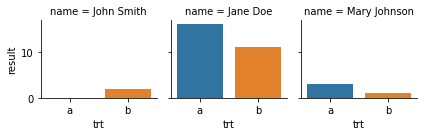

In [143]:
# Look at some of the awesome out-of-the-box seaborn functionality:
import seaborn as sns

sns.catplot(x = 'trt', y = 'result', col = 'name', kind='bar', data= tidy1, height=2);

In [144]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

Instead of a plot with 50 products, we'll just do two — the first products from each list

* Half And Half Ultra Pasteurized
* Half Baked Frozen Yogurt

So, given a product_name we need to calculate its order_hour_of_day pattern.

In [145]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


# Subset and Merge
One challenge of performing a merge on this data is that the products and orders datasets do not have any common columns that we can merge on. Due to this we will have to use the order_products dataset to provide the columns that we will use to perform the merge.

Here's the two products that we want to work with.

In [146]:
product_names = ['Half Baked Frozen Yogurt', 'Half and Half Ultra Pasteurized']

In [147]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [148]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']


This might blow your mind, but we're going to subset the dataframes to select specific columns and merge them all in one go. Ready?

In [149]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

Ok, so we were a little bit lazy and probably should have subsetted out the rows of our dataframes before we merged them. We are going to filter after the fact. This is something that you can try out for practice. Can you figure out how to filter these dataframes before merging rather than after?

In [150]:
# table2 -> tidy

In [151]:
# tidy -> table2

In [152]:
flights = sns.load_dataset('flights')

In [153]:
# Flights Pivot Table

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [154]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [155]:
##### YOUR CODE HERE #####